In [42]:
import cartopy
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
from datetime import datetime
import numpy as np

In [43]:
file = "AMSR2_ASI_sea_ice_concentration_201506.nc"
ds = xr.open_dataset(file)

In [14]:
ds

<xarray.Dataset>
Dimensions:              (time: 31, x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
  * time                 (time) datetime64[ns] 2015-08-01 ... 2015-08-31
Data variables:
    polar_stereographic  (time) |S1 ...
    z                    (time, y, x) float32 ...
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 19:15:02 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

In [45]:
ds_plt = ds['z'].mean('time', keep_attrs=True).squeeze()#('member_id')

In [33]:
ds_plt

<xarray.DataArray 'z' (y: 1792, x: 1216)>
array([[nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x        (x) float64 -3.847e+06 -3.841e+06 ... 3.741e+06 3.747e+06
  * y        (y) float64 -5.347e+06 -5.341e+06 ... 5.841e+06 5.847e+06
Attributes:
    long_name:     z
    actual_range:  [  0 100]
    grid_mapping:  polar_stereographic

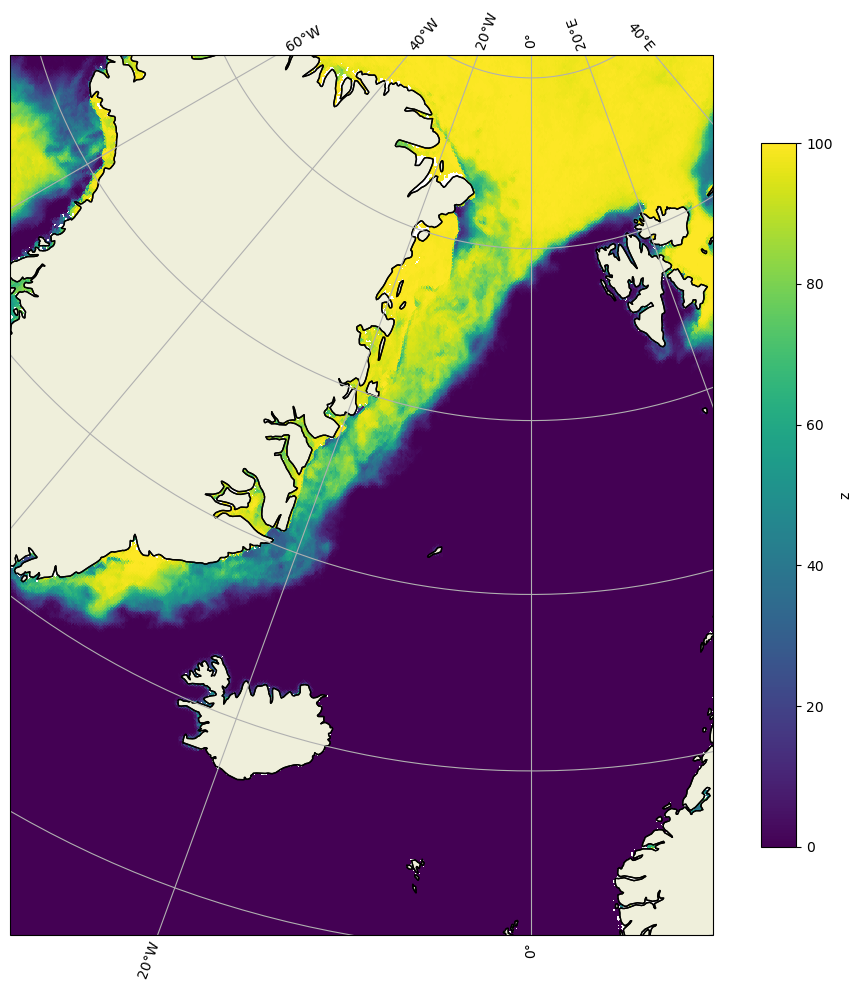

In [47]:
extent = [-30, 10, 85, 60]
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

ds_plt.plot.pcolormesh(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    # transform=ccrs.PlateCarree(),
    transform=ccrs.epsg(3411),
    # levels=10,
        )
ax.set_extent(extent, ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()
plt.savefig('Jul2015.png')